In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import gym
import pandas
import torch
import torch.nn as nn
import random
from collections import deque
from agents.DQN import DQN
from networks.standard_network import standardNN
from networks.basic_network import basicNN
import gym
from torch import nn
import torch
from typing import Union
import numpy as np
from environments.easy import easy_env

In [20]:
from matplotlib import pyplot as plt
def moving_average(x, window_length: Union[int, None] = None) -> np.ndarray:
    if window_length is None:
        window_length = max(len(x) // 50, 1)
    return np.convolve(x, np.ones(window_length), "valid") / window_length

def plot_results(test_rewards):
    ma_rewards = moving_average(test_rewards)
    plt.plot(ma_rewards, label="rewards")
    plt.show()

In [108]:
env = gym.make('CartPole-v1', new_step_api=True)


try:
    n_obs = env.reset().size
except AttributeError:
    try: n_obs = env.observation_space.n
    except AttributeError:
        print('oh no, n_obs unknown')

try: n_actions = env.action_space.n
except AttributeError:
    print('oh no, n_obs unknown')

In [116]:
# network1 = basicNN(n_obs, n_actions)
network1 = standardNN(n_obs, n_actions)
max_games = 5000
agent = DQN(
    network1,
    n_actions,
    n_obs,
    env,
    max_games=max_games,
    min_epsilon=0.1,
    lr=1e-3,
    alpha=0.2,
    gamma=0.99,
    mini_batch_size=32,
    games_to_decay_epsilon_for=max_games // 2,
    state_type='d'
)

In [117]:
agent.play_games()
total_rewards = [i[-1] for i in agent.reward_averages]
plot_results(total_rewards)

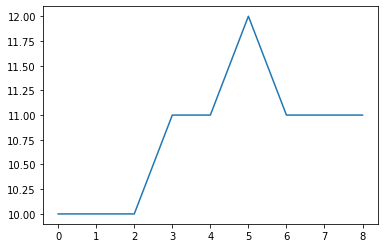

{0: 69, 1: 28}
10.777777777777779


In [ ]:
agent.evaluation_mode = True
agent.play_games(10)
total_rewards = [i[-1] for i in agent.evaluation_reward_averages]
plot_results(total_rewards)
print(agent.evaluation_action_counts)
print(sum(total_rewards) / len(total_rewards))
agent.evaluation_mode = False

In [ ]:
a = np.array(3)
b = torch.tensor(a, dtype=torch.float32)
c = b
d = c.squeeze()
e = d.unsqueeze(dim=-1)
print(a, b, c, d, e)
print(b.size())
print(c.size())
print(d.size())
print(e.size())